Practica final
1.-En base a la siguiente figura, Identifica de cada uno de los elementos(elementos específicos)su área, perímetro y centroide,a cada uno de los objetos debe ser inscrito dentro un recuadro, una elipse, un círculo y marcar una línea divisora en el medio tomando de referencia el centroide (cada uno de estos conceptos en un sub plot distinto)tomar en cuenta que el color de las figuras mencionadas debe ser el mismo que tiene el objeto seleccionado. 

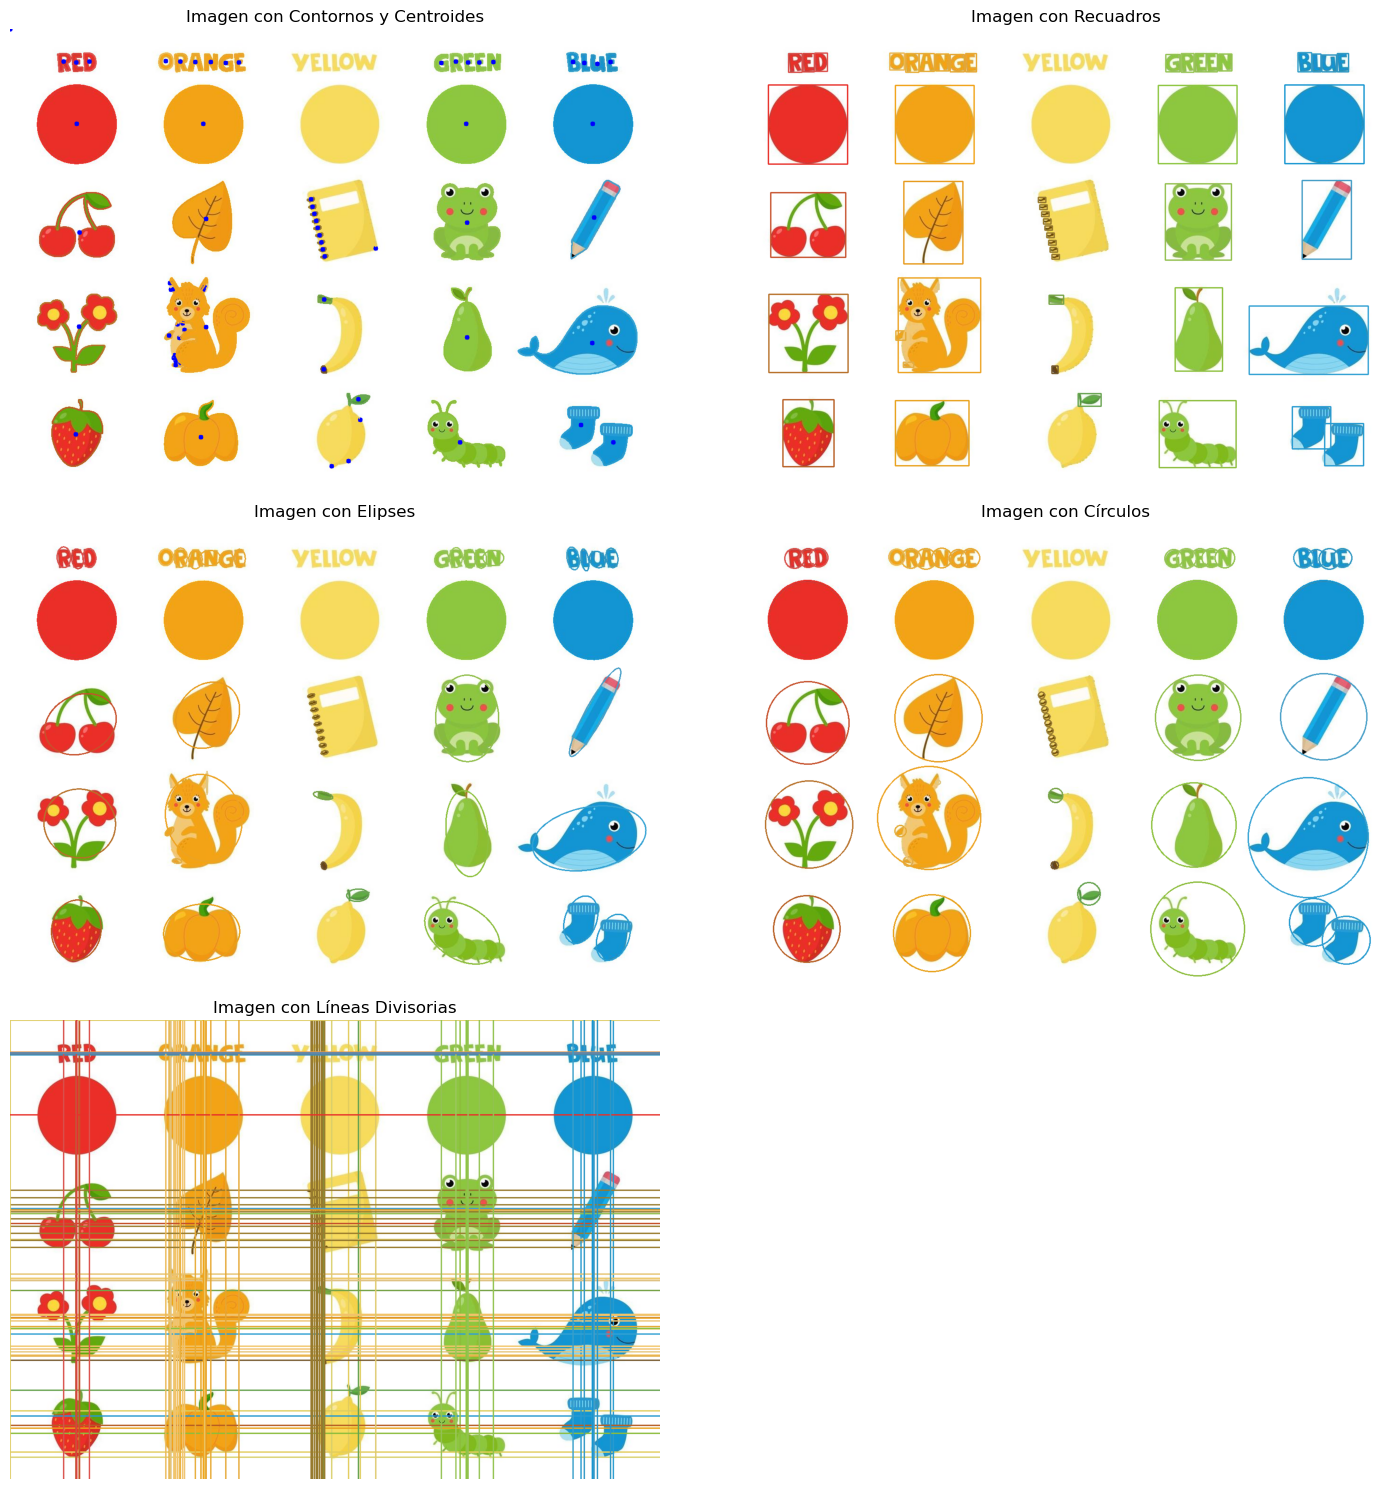

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_average_color(image, contour):
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)
    mean = cv2.mean(image, mask=mask)[:3]
    return tuple(map(int, mean))

img = cv2.imread('colores.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

contornos, jerarquia = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_contornos = img_rgb.copy()
img_recuadros = img_rgb.copy()
img_elipses = img_rgb.copy()
img_circulos = img_rgb.copy()
img_lineas = img_rgb.copy()

for i, contar in enumerate(contornos):
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cX = int(momento["m10"] / momento["m00"]) 
        cY = int(momento["m01"] / momento["m00"])  
    else:
        cX, cY = 0, 0

    area = cv2.contourArea(contar)
    perimetro = cv2.arcLength(contar, True)

    color_promedio = get_average_color(img_rgb, contar)

    x, y, w, h = cv2.boundingRect(contar)
    cv2.rectangle(img_recuadros, (x, y), (x + w, y + h), color_promedio, 2)

    if len(contar) >= 5:
        elipse = cv2.fitEllipse(contar)
        cv2.ellipse(img_elipses, elipse, color_promedio, 2)

    (x_circulo, y_circulo), radio = cv2.minEnclosingCircle(contar)
    centro = (int(x_circulo), int(y_circulo))
    cv2.circle(img_circulos, centro, int(radio), color_promedio, 2)

    cv2.drawContours(img_contornos, [contar], -1, color_promedio, 2)
    cv2.circle(img_contornos, (cX, cY), 5, (0, 0, 255), -1)

    cv2.line(img_lineas, (cX, 0), (cX, img.shape[0]), color_promedio, 2)
    cv2.line(img_lineas, (0, cY), (img.shape[1], cY), color_promedio, 2)

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.title('Imagen con Contornos y Centroides')
plt.imshow(img_contornos)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Imagen con Recuadros')
plt.imshow(img_recuadros)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Imagen con Elipses')
plt.imshow(img_elipses)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Imagen con Círculos')
plt.imshow(img_circulos)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Imagen con Líneas Divisorias')
plt.imshow(img_lineas)
plt.axis('off')

plt.tight_layout()
plt.show()

SEGUNDO  EJERCICIO

1. Umbralizacion

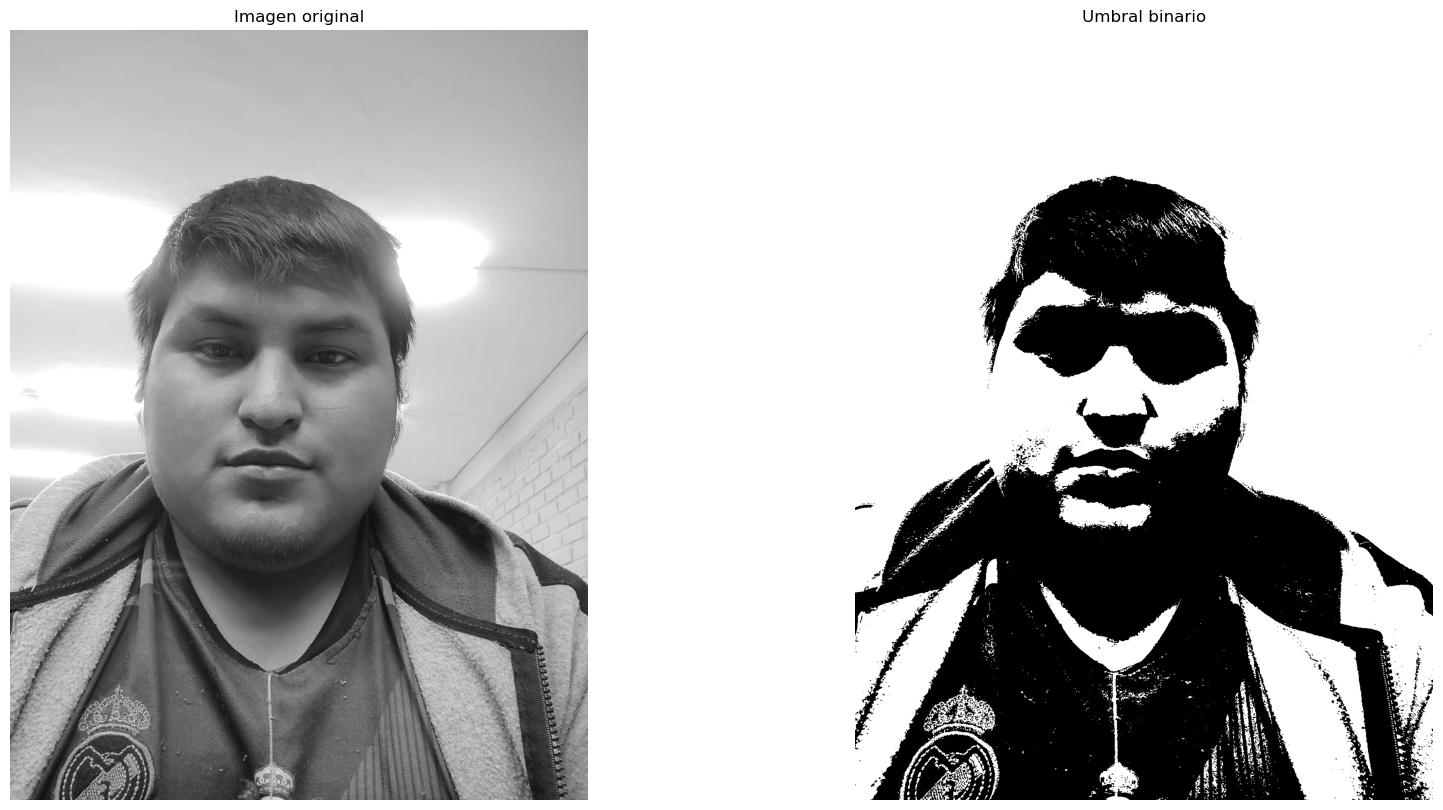

In [19]:
import cv2
import matplotlib.pyplot as plt

def histograma(img):

    img = cv2.imread('marbis.jpg', 0)
    _,umbral_bi = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(20, 10))

    plt.subplot(121)
    plt.title('Imagen original')
    plt.imshow(img, cmap = "gray")
    plt.axis('off')

    plt.subplot(122)
    plt.title('Umbral binario')
    plt.imshow(umbral_bi, cmap='gray')
    plt.axis('off')

    plt.show()

imagen = cv2.imread('tofo.jpg', 0)
histograma(imagen)

2. Cambio de color

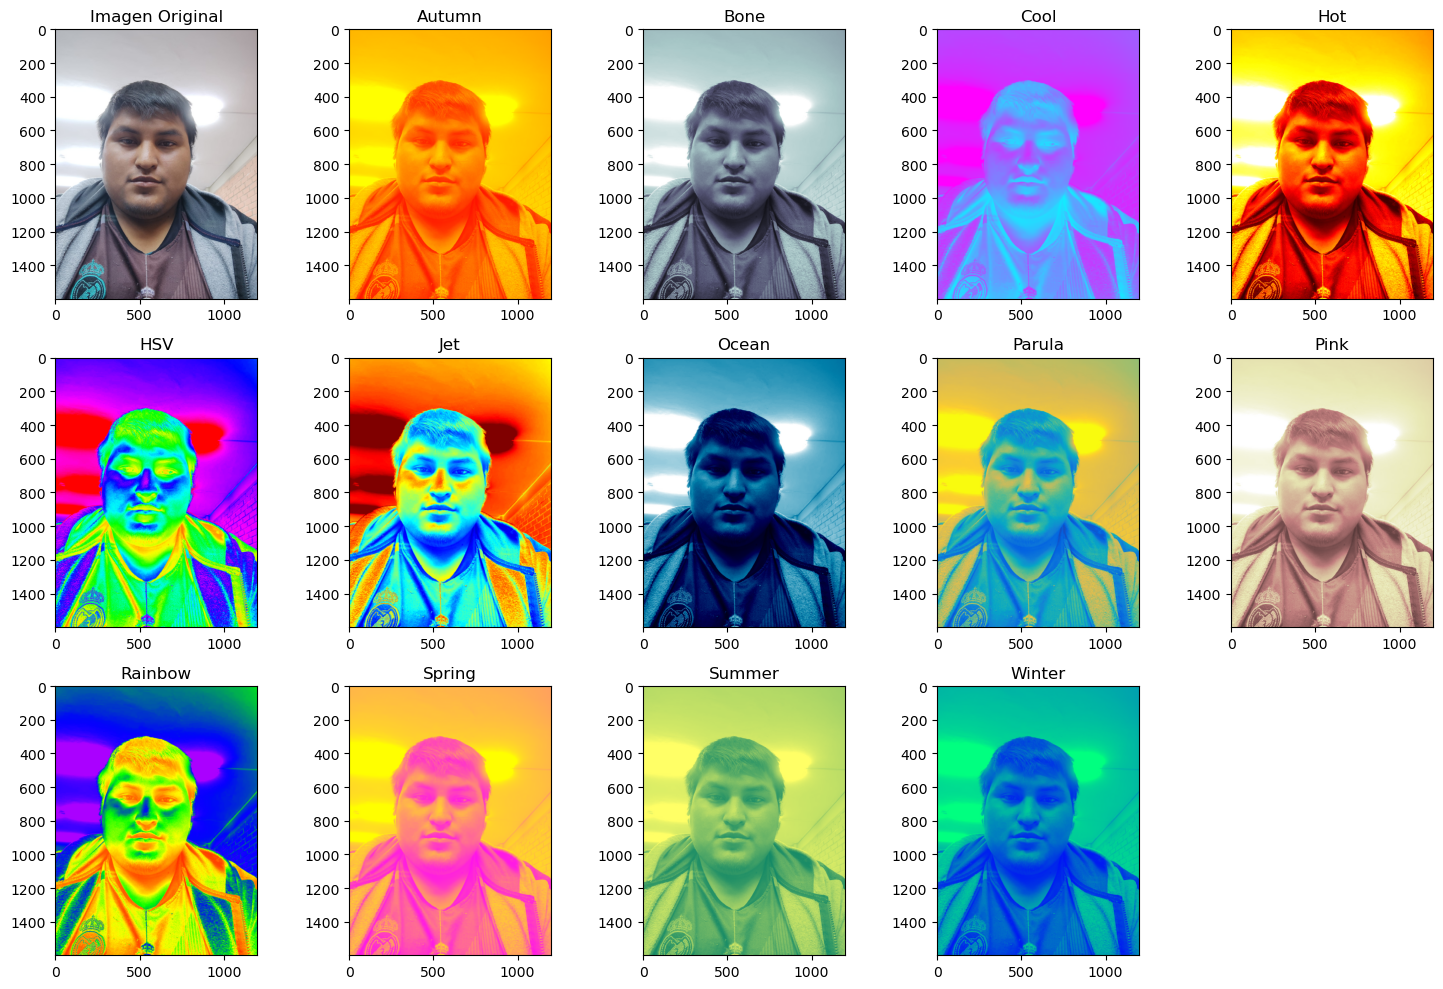

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de paletas de colores predefinidas en OpenCV
paletas = [cv2.COLORMAP_AUTUMN, cv2.COLORMAP_BONE, cv2.COLORMAP_COOL,
           cv2.COLORMAP_HOT, cv2.COLORMAP_HSV, cv2.COLORMAP_JET,
           cv2.COLORMAP_OCEAN, cv2.COLORMAP_PARULA, cv2.COLORMAP_PINK,
           cv2.COLORMAP_RAINBOW, cv2.COLORMAP_SPRING, cv2.COLORMAP_SUMMER,
           cv2.COLORMAP_WINTER]

# Lista de nombres de las paletas de colores
nombres_paletas = ["Autumn", "Bone", "Cool", "Hot", "HSV", "Jet", "Ocean", 
                   "Parula", "Pink", "Rainbow", "Spring", "Summer", "Winter"]

# Cargar la imagen
imagen = cv2.imread("marbis.jpg")

# Mostrar la imagen original
plt.figure(figsize=(15, 10))
plt.subplot(3, 5, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")


# Ciclo para mostrar cada paleta de colores aplicada a la imagen
for i, paleta in enumerate(paletas):
    # Aplicar la paleta de colores a la imagen
    imagen_paleta = cv2.applyColorMap(imagen, paleta)    
    # Mostrar la imagen con la paleta de colores y su nombre
    plt.subplot(3, 5, i+2)
    plt.imshow(cv2.cvtColor(imagen_paleta, cv2.COLOR_BGR2RGB))
    plt.title(nombres_paletas[i])
plt.tight_layout()
plt.show()


3. Convolución con kernel propio

(-0.5, 1199.5, 1598.5, -0.5)

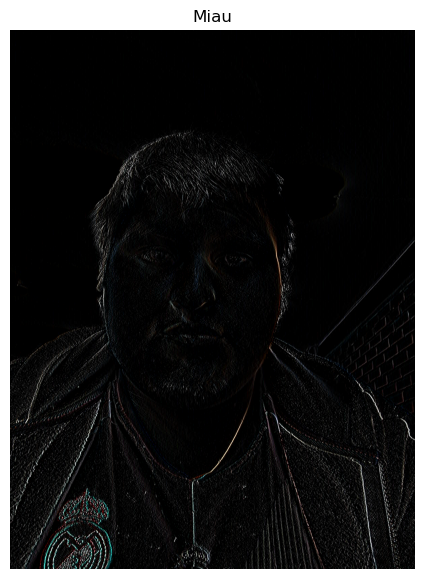

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagenRecibida = cv2.imread('marbis.jpg')
img_original = cv2.cvtColor(imagenRecibida, cv2.COLOR_BGR2RGB)

KernelMio = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]])
Convolucionada = cv2.filter2D(img_original, -1, KernelMio)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(Convolucionada, cmap='gray')
plt.title('Miau')
plt.axis('off')



4. Convolución con kernel predefinido (el de tu preferencia)

(-0.5, 1199.5, 1598.5, -0.5)

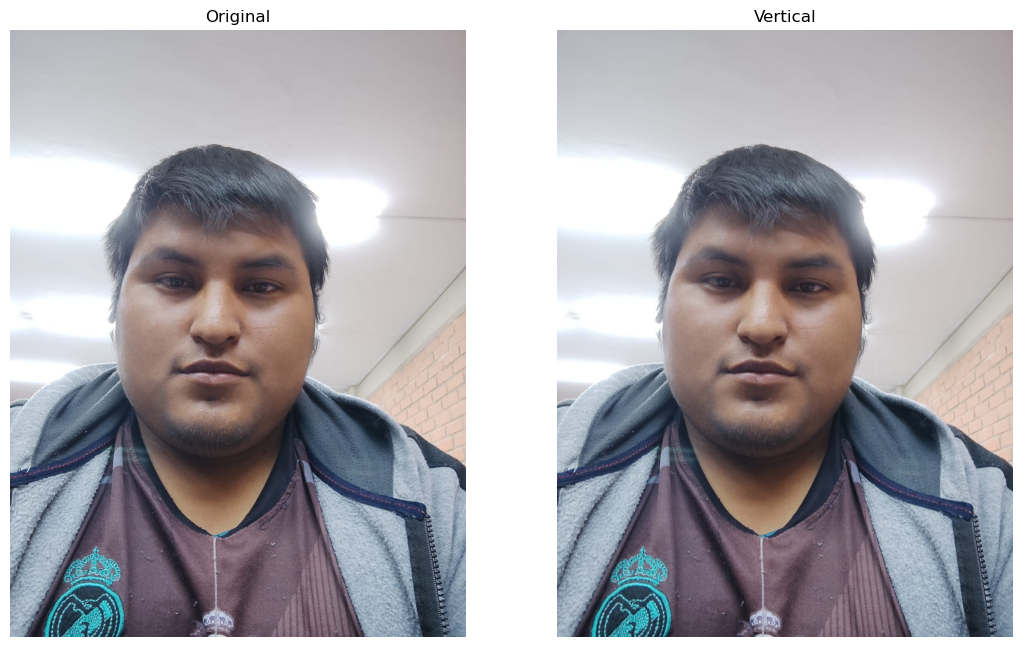

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def conv_vertical(img,mascara1):
    mascara=np.ones((mascara1,1),np.float32)/mascara1
    imgFin=cv2.filter2D(img,-1,mascara)
    return imgFin

imagen = cv2.imread("marbis.jpg")
img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

img_r = conv_vertical(img_rgb[:,:,0], 3)
img_g = conv_vertical(img_rgb[:,:,1], 3)
img_b = conv_vertical(img_rgb[:,:,2], 3)

img_fin = np.stack([img_r,img_g, img_b], axis=2)

plt.figure(figsize=(20, 8))
plt.subplot(131)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(132)
plt.title('Vertical')
plt.imshow(img_fin)
plt.axis('off')

5. Selecciona tu ojo izquierdo en la imagen y aplícale canny

Text(0.5, 1.0, 'Original')

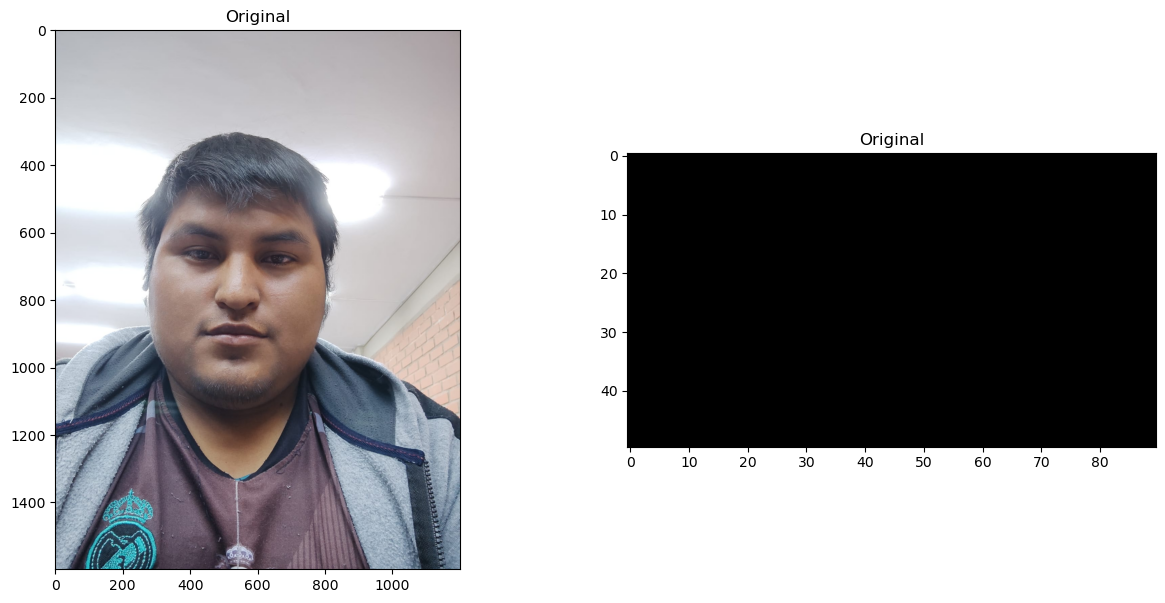

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagenRecibida = cv2.imread('marbis.jpg')
img_original = cv2.cvtColor(imagenRecibida, cv2.COLOR_BGR2RGB)

img_cortada = img_original[150:200,160:250,:]

bordes_canny = cv2.Canny(img_cortada, 100, 200)

plt.figure(figsize=(15, 7))

#Se muestra la primera imagen
plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original')

#Se muestra la seegunda imagen recortada
plt.subplot(1, 2, 2)
plt.imshow(bordes_canny, cmap='gray') #Se utiliza el axis con las coordenadas [610:800,660:840,:]
plt.title('Original')




6. Aplica el filtro de neblina

(-0.5, 1199.5, 1598.5, -0.5)

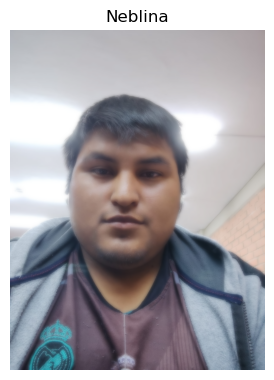

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("marbis.jpg")

imagen_original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imagen_empañada = cv2.GaussianBlur(imagen_original, (41, 41), 0)

img_fin = (0.3 * imagen_original + 0.7 * imagen_empañada).astype(np.uint8)


plt.figure(figsize=(15, 15))
plt.subplot(336), plt.imshow(img_fin), plt.title('Neblina')
plt.axis('off')

7. Detecta los bordes de la imagen

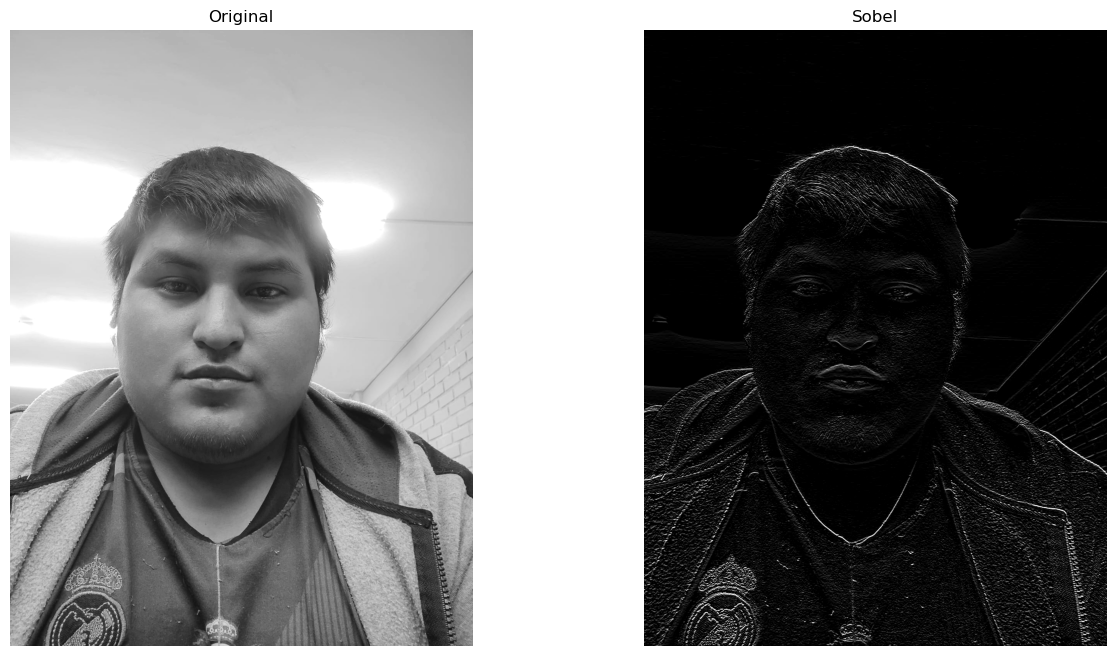

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('marbis.jpg',0)

mascaraSobelX = np.array([[1, 0, -1], [ 2, 0,  -2], [1, 0, -1]])
mascaraSobelY = np.array([[1, 2, 1], [ 0, 0,  0], [-1, -2, -1]])

Sobel = cv2.filter2D(img, -1, mascaraSobelX)
Sobel = cv2.filter2D(img, -1, mascaraSobelY)

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.title('Original')
plt.imshow(img ,cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Sobel')
plt.imshow(Sobel ,cmap='gray')
plt.axis('off')

plt.show()

8. Identifica el área, perímetro y centroide de la imagen

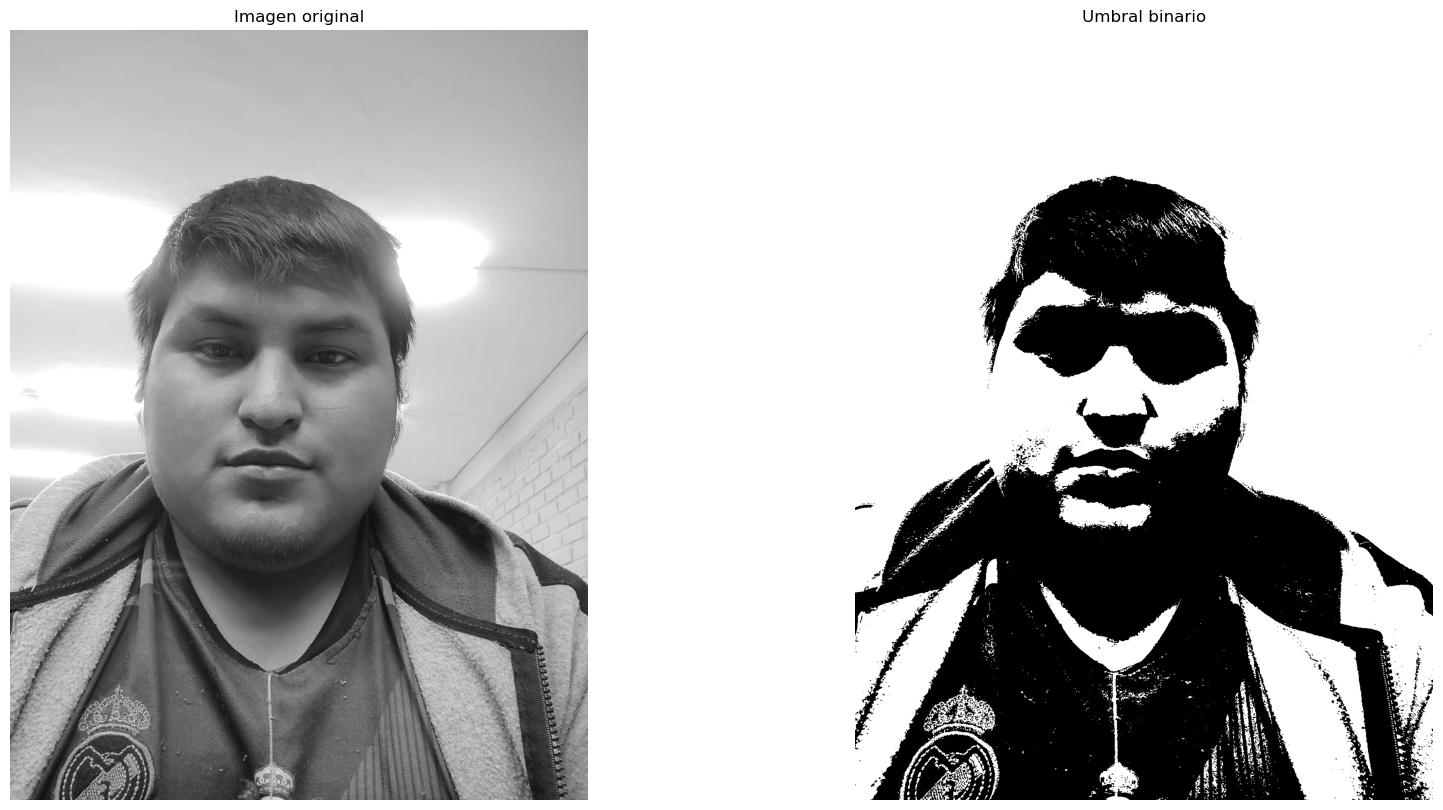

In [30]:
import cv2
import matplotlib.pyplot as plt

def histograma(img):

    img = cv2.imread('marbis.jpg', 0)
    _,umbral_bi = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(20, 10))

    plt.subplot(121)
    plt.title('Imagen original')
    plt.imshow(img, cmap = "gray")
    plt.axis('off')

    plt.subplot(122)
    plt.title('Umbral binario')
    plt.imshow(umbral_bi, cmap='gray')
    plt.axis('off')

    plt.show()

imagen = cv2.imread('tofo.jpg', 0)
histograma(imagen)

Area 1  = 1.0
Perimetro 1  = 4
Area 2  = 0.0
Perimetro 2  = 2
Area 3  = 0.5
Perimetro 3  = 6
Area 4  = 0.0
Perimetro 4  = 2
Area 5  = 0.0
Perimetro 5  = 4
Area 6  = 0.0
Perimetro 6  = 0
Area 7  = 0.0
Perimetro 7  = 0
Area 8  = 0.0
Perimetro 8  = 2
Area 9  = 0.0
Perimetro 9  = 0
Area 10  = 0.0
Perimetro 10  = 0
Area 11  = 0.0
Perimetro 11  = 0
Area 12  = 0.0
Perimetro 12  = 0
Area 13  = 16.0
Perimetro 13  = 26
Area 14  = 0.0
Perimetro 14  = 0
Area 15  = 0.0
Perimetro 15  = 2
Area 16  = 0.0
Perimetro 16  = 0
Area 17  = 0.0
Perimetro 17  = 0
Area 18  = 105.0
Perimetro 18  = 102
Area 19  = 3.5
Perimetro 19  = 15
Area 20  = 0.0
Perimetro 20  = 2
Area 21  = 13.5
Perimetro 21  = 32
Area 22  = 0.0
Perimetro 22  = 2
Area 23  = 33.0
Perimetro 23  = 37
Area 24  = 0.0
Perimetro 24  = 2
Area 25  = 1.5
Perimetro 25  = 5
Area 26  = 2.5
Perimetro 26  = 12
Area 27  = 308.5
Perimetro 27  = 198
Area 28  = 4.0
Perimetro 28  = 7
Area 29  = 0.0
Perimetro 29  = 0
Area 30  = 0.5
Perimetro 30  = 3
Area 31  = 0

(-0.5, 1199.5, 1598.5, -0.5)

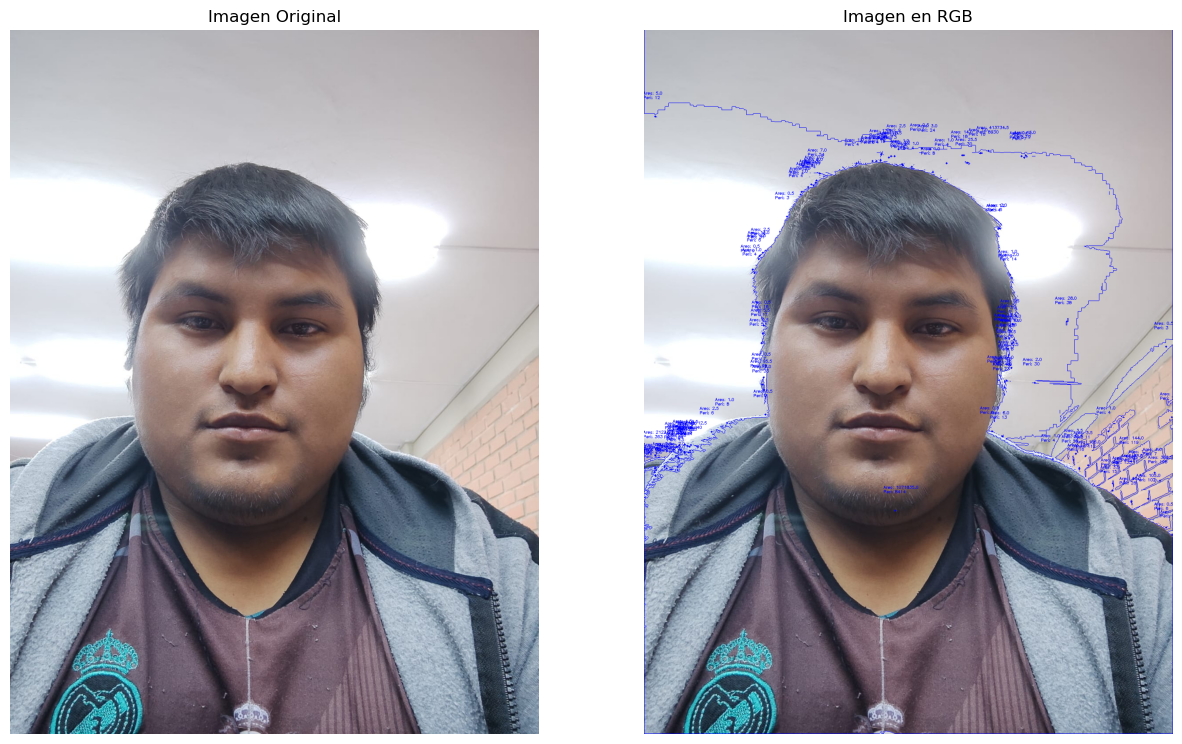

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('marbis.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

contornos, Tipo = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for i, contar in enumerate(contornos):
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cX = int(momento["m10"] / momento["m00"]) 
        cY = int(momento["m01"] / momento["m00"])  
    else:
        cX, cY = 0, 0

    area = cv2.contourArea(contar)
    print("Area", i + 1, " =", area)

    perimetro = int(cv2.arcLength(contar, True))
    print("Perimetro", i + 1, " =", perimetro)

    cv2.putText(img_rgb, "Area: " + str(area), (cX - 27, cY-50), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1) 
    cv2.putText(img_rgb, "Peri: " + str(perimetro), (cX-27 , cY-40), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

    cv2.circle(img_rgb, (cX, cY), 2, (0, 0, 255), -1)

    cv2.drawContours(img_rgb, [contar], -1, (0, 0, 255), 1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen en RGB')
plt.imshow(img_rgb)
plt.axis('off')

9. El objeto seleccionado inscríbelo dentro de un cuadro de color rosa

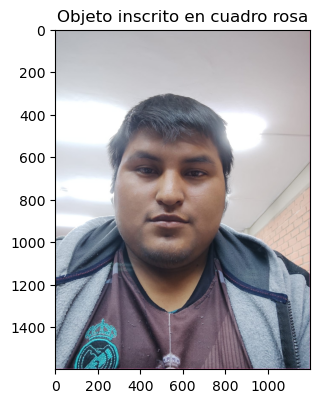

(0.0, 1.0, 0.0, 1.0)

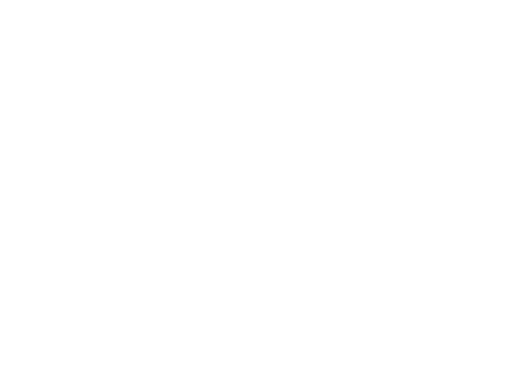

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("marbis.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)


Conco = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)

Contornos, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(cnt) for cnt in Contornos]
Perimetros = [cv2.arcLength(cnt, True) for cnt in Contornos]
M = [cv2.moments(cnt) for cnt in Contornos]
centroids = [(int(m['m10']/m['m00']), int(m['m01']/m['m00'])) if m['m00'] != 0 else (0, 0) for m in M]


Contornoooo = max(Contornos, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(Contornoooo)
cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 105, 180), 2)

plt.figure(figsize=(15, 15))
plt.subplot(339), plt.imshow(image_rgb), plt.title('Objeto inscrito en cuadro rosa')
plt.show()
plt.axis('off')